In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [78]:
def t3d(point2d):
    return np.array([point2d[0], point2d[1], 0])

def inside_traingle(point, point1, point2, point3):
    point = t3d(point)
    point1 = t3d(point1)
    point2 = t3d(point2)
    point3 = t3d(point3)
    
    v1 = point1 - point
    v2 = point2 - point
    v3 = point3 - point
    d1 = np.cross(v1, v2)[2]
    d2 = np.cross(v2, v3)[2]
    d3 = np.cross(v3, v1)[2]
    if (d1 > 0 and d2 > 0 and d3 > 0) or (d1 < 0 and d2 < 0 and d3 < 0):
        return True
    else:
        return False

def draw_traingle(img, point1, point2, point3, color):
    height, width = img.shape[0], img.shape[1]
    points = np.stack((point1, point2, point3))
    min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])
    min_y, max_y = np.min(points[:, 1]), np.max(points[:, 1])

    for x in range(max(0, int(np.floor(min_x))), min(width, int(np.ceil(max_x)))):
        for y in range(max(0, int(np.floor(min_y))), min(height, int(np.ceil(max_y)))):
            if inside_traingle([x+0.5, y+0.5], point1, point2, point3):
                img[x, y] = color

    return img
    
def draw_traingle_msaa(img, point1, point2, point3, color):
    height, width = img.shape[0], img.shape[1]
    points = np.stack((point1, point2, point3))
    min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])
    min_y, max_y = np.min(points[:, 1]), np.max(points[:, 1])

    s = -0.75
    e = 1.0
    d = 0.25
    a = np.arange(s, e, d)
    xx, yy = np.meshgrid(a, a)
    xx = xx.reshape(-1)
    yy = yy.reshape(-1)
    a

    print(xx, yy)
    for x in range(max(0, int(np.floor(min_x))), min(width, int(np.ceil(max_x)))):
        for y in range(max(0, int(np.floor(min_y))), min(height, int(np.ceil(max_y)))):
            weight = 0
            for i in range(len(xx)):
                dx, dy = xx[i], yy[i]
                if inside_traingle([x+0.5+dx, y+0.5+dy], point1, point2, point3):
                    weight += 1.0
            if weight > 0.0:
                weight /= len(xx)
                # 和背景融合一下，否则有黑边
                delta = 0.0 # 融合时让前景权重更大
                img[x, y] = color * (weight + delta) + img[x, y] * (1 - weight - delta)

    return img

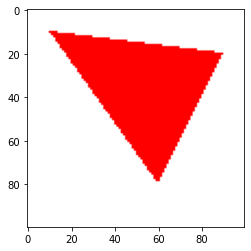

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25
  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5
  0.75] [-0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.5  -0.5  -0.5  -0.5  -0.5
 -0.5  -0.5  -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.    0.    0.
  0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.5
  0.5   0.5   0.5   0.5   0.5   0.5   0.75  0.75  0.75  0.75  0.75  0.75
  0.75]


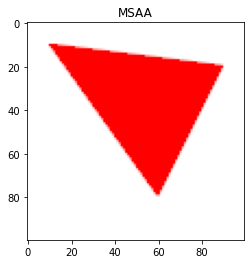

In [79]:
# img = np.zeros((100, 100, 3), dtype=np.uint8) * 255
img = np.ones((100, 100, 3), dtype=np.uint8) * 255

img1 = draw_traingle(img, 
              np.array([10, 10]), np.array([80, 60]), np.array([20, 90]), 
              np.array([255, 0, 0]))

# plt.figure(figsize=[10, 10])
plt.imshow(img1)
plt.show()

img2 = draw_traingle_msaa(img, 
              np.array([10, 10]), np.array([80, 60]), np.array([20, 90]), 
              np.array([255, 0, 0]))
# plt.figure(figsize=[10, 10])
plt.title('MSAA')
plt.imshow(img2)
plt.show()

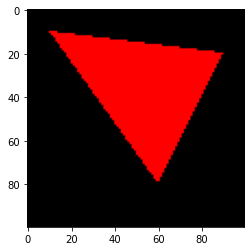

[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25
  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75 -0.75 -0.5  -0.25  0.    0.25  0.5
  0.75] [-0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.5  -0.5  -0.5  -0.5  -0.5
 -0.5  -0.5  -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.    0.    0.
  0.    0.    0.    0.    0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.5
  0.5   0.5   0.5   0.5   0.5   0.5   0.75  0.75  0.75  0.75  0.75  0.75
  0.75]


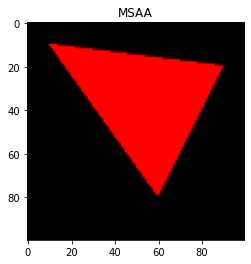

In [80]:
img = np.zeros((100, 100, 3), dtype=np.uint8) * 255
# img = np.ones((100, 100, 3), dtype=np.uint8) * 255

img1 = draw_traingle(img, 
              np.array([10, 10]), np.array([80, 60]), np.array([20, 90]), 
              np.array([255, 0, 0]))

# plt.figure(figsize=[10, 10])
plt.imshow(img1)
plt.show()

img2 = draw_traingle_msaa(img, 
              np.array([10, 10]), np.array([80, 60]), np.array([20, 90]), 
              np.array([255, 0, 0]))
# plt.figure(figsize=[10, 10])
plt.title('MSAA')
plt.imshow(img2)
plt.show()